In [109]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import math
from datetime import datetime
import tweepy
from textblob import TextBlob
%matplotlib inline

In [3]:
#Step 1 - load API keys
with open('../.keys') as f:
    keys = f.readlines()
    keys = [key.strip() for key in keys] 

# authenticate using tweepy 
auth = tweepy.OAuthHandler(consumer_key=keys[0],consumer_secret=keys[1])
auth.set_access_token(key=keys[2],secret=keys[3])
# define a main API variable
api = tweepy.API(auth)

In [66]:
#Step 2- search for public tweets about some company
public_tweets = api.search(q="Amazon", count=100, tweet_mode="extended")

In [67]:
#Step 3 - Evaluate overall sentiment
threshold = 0.3
positive = 0
for tweet in public_tweets:
    try:
        text = tweet.retweeted_status.full_text
    except:
        text = tweet.full_text
    sentiment = TextBlob(text).sentiment
    if sentiment[0]>threshold:
        positive = positive + 1

invest = positive > len(public_tweets)*0.1
print("Invest: ", invest)

Invest:  False


In [211]:
def get_data(filename):
    df = pd.read_csv(filename)
    dates = [datetime.strptime(date, '%d-%b-%y').strftime('%y%m%d') for date in df["Date"]][::-1]
    prices = [float(value) for value in df["Open"]][::-1]
    return np.array(dates).reshape((len(dates),1)), np.array(prices).reshape((len(prices),1))

In [213]:
dates, dataset = get_data("amzn.csv")

In [214]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

168 83


In [215]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [235]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [236]:
from keras.models import Sequential
from keras.layers import Dense

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(100, input_dim=look_back, activation='relu'))
model.add(Dense(60))
model.add(Dense(40))
model.add(Dense(20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=2, verbose=2)

Epoch 1/500
0s - loss: 95053.2133
Epoch 2/500
0s - loss: 311.5832
Epoch 3/500
0s - loss: 284.1700
Epoch 4/500
0s - loss: 311.6876
Epoch 5/500
0s - loss: 315.8656
Epoch 6/500
0s - loss: 286.8582
Epoch 7/500
0s - loss: 323.6542
Epoch 8/500
0s - loss: 351.7584
Epoch 9/500
0s - loss: 397.7257
Epoch 10/500
0s - loss: 395.8154
Epoch 11/500
0s - loss: 328.3400
Epoch 12/500
0s - loss: 300.1388
Epoch 13/500
0s - loss: 271.2583
Epoch 14/500
0s - loss: 379.6005
Epoch 15/500
0s - loss: 324.5002
Epoch 16/500
0s - loss: 261.2919
Epoch 17/500
0s - loss: 466.8445
Epoch 18/500
0s - loss: 327.6838
Epoch 19/500
0s - loss: 475.3262
Epoch 20/500
0s - loss: 441.2325
Epoch 21/500
0s - loss: 295.4695
Epoch 22/500
0s - loss: 444.6297
Epoch 23/500
0s - loss: 360.0265
Epoch 24/500
0s - loss: 413.8845
Epoch 25/500
0s - loss: 338.2163
Epoch 26/500
0s - loss: 449.6536
Epoch 27/500
0s - loss: 399.4831
Epoch 28/500
0s - loss: 347.0649
Epoch 29/500
0s - loss: 345.0543
Epoch 30/500
0s - loss: 298.2665
Epoch 31/500
0s -

0s - loss: 289.8294
Epoch 246/500
0s - loss: 346.1492
Epoch 247/500
0s - loss: 334.2974
Epoch 248/500
0s - loss: 336.1903
Epoch 249/500
0s - loss: 293.7713
Epoch 250/500
0s - loss: 318.5357
Epoch 251/500
0s - loss: 545.1844
Epoch 252/500
0s - loss: 325.5697
Epoch 253/500
0s - loss: 408.6989
Epoch 254/500
0s - loss: 302.2529
Epoch 255/500
0s - loss: 322.6609
Epoch 256/500
0s - loss: 352.5384
Epoch 257/500
0s - loss: 359.0369
Epoch 258/500
0s - loss: 471.5228
Epoch 259/500
0s - loss: 320.1925
Epoch 260/500
0s - loss: 246.1661
Epoch 261/500
0s - loss: 254.5067
Epoch 262/500
0s - loss: 298.9560
Epoch 263/500
0s - loss: 257.5233
Epoch 264/500
0s - loss: 272.4347
Epoch 265/500
0s - loss: 353.9412
Epoch 266/500
0s - loss: 277.1496
Epoch 267/500
0s - loss: 403.8229
Epoch 268/500
0s - loss: 544.0885
Epoch 269/500
0s - loss: 313.2757
Epoch 270/500
0s - loss: 379.8012
Epoch 271/500
0s - loss: 277.6573
Epoch 272/500
0s - loss: 315.4349
Epoch 273/500
0s - loss: 258.8302
Epoch 274/500
0s - loss: 314

0s - loss: 252.9272
Epoch 487/500
0s - loss: 277.3409
Epoch 488/500
0s - loss: 295.5278
Epoch 489/500
0s - loss: 298.4459
Epoch 490/500
0s - loss: 244.4574
Epoch 491/500
0s - loss: 253.3866
Epoch 492/500
0s - loss: 308.0146
Epoch 493/500
0s - loss: 348.7076
Epoch 494/500
0s - loss: 396.3274
Epoch 495/500
0s - loss: 414.3184
Epoch 496/500
0s - loss: 257.6776
Epoch 497/500
0s - loss: 261.7021
Epoch 498/500
0s - loss: 289.1894
Epoch 499/500
0s - loss: 244.2499
Epoch 500/500
0s - loss: 288.0183


In [237]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 242.84 MSE (15.58 RMSE)
Test Score: 569.74 MSE (23.87 RMSE)


In [238]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


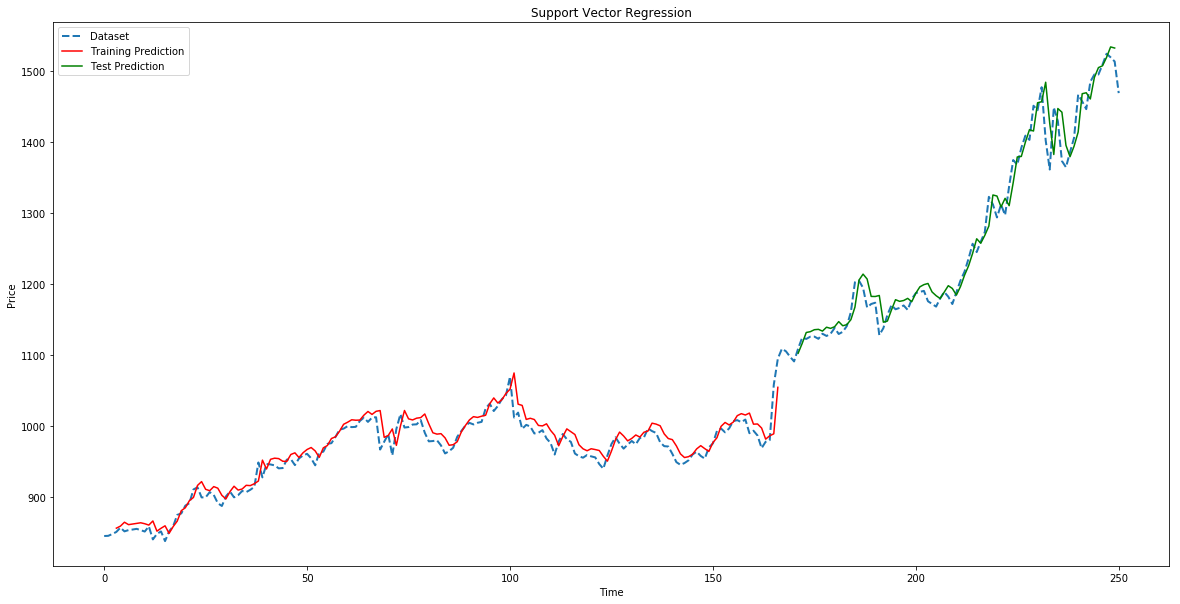

In [241]:
plt.figure(figsize=(20,10))
plt.plot(dataset,'--', linewidth=2, label="Dataset")
plt.plot(trainPredictPlot, color="red", label="Training Prediction")
plt.plot(testPredictPlot, color="green", label="Test Prediction")
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()